### Importing necessary modules

In [1]:
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models.graphs import from_networkx
from bokeh.models import ColumnDataSource,CDSView
from bokeh.models.markers import Circle
import pandas as pd


In [2]:
#calculating normalized degree centraility
def centrality_degree(adj_matrix):
    degree_centraility = {}
    A = np.array(adj_matrix)
    nodes = A.shape[0]
    # calculating degree centraility
    degree = np.count_nonzero(A, axis =1)
    for n in range(nodes):
        degree_centraility[n] = degree[n]/(nodes-1)
    return degree_centraility

centrality_degree([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
             [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])

{0: 0.375,
 1: 0.25,
 2: 0.375,
 3: 0.5,
 4: 0.5,
 5: 0.5,
 6: 0.5,
 7: 0.375,
 8: 0.125}

In [3]:
#calculating power until all values are non-zero - Assumption graph is connected
def calculate_A_powers(A):
    A_powers = []
    m = 1
    while True:
        next_power = np.linalg.matrix_power(A,m)
        A_powers.append(next_power)
        if(np.all(next_power!=0)) :
            break
        m = m+1
    return A_powers

len(calculate_A_powers(np.array([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
             [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])))

5

In [4]:
def cal_minlengths_sigma(adj_matrix):
    A = np.array(adj_matrix)
    A_powers = calculate_A_powers(A)
    nodes = A.shape[0]
    sigma = np.zeros((int(nodes),int(nodes)))
    min_lengths = np.zeros((int(nodes),int(nodes)))
    for i in range(nodes):
        for j in range(nodes):
            for x in range(len(A_powers)):
                X = A_powers[x].copy()
                if X[i,j] > 0 and i != j:
                    sigma[i,j] = X[i,j]
                    min_lengths[i,j] = x + 1
                    break
    return [min_lengths,sigma]

In [5]:
t = cal_minlengths_sigma([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
             [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])
print(t[0])
print(t[1])

[[ 0.  1.  1.  1.  2.  2.  3.  3.  4.]
 [ 1.  0.  1.  2.  3.  3.  4.  4.  5.]
 [ 1.  1.  0.  1.  2.  2.  3.  3.  4.]
 [ 1.  2.  1.  0.  1.  1.  2.  2.  3.]
 [ 2.  3.  2.  1.  0.  1.  1.  1.  2.]
 [ 2.  3.  2.  1.  1.  0.  1.  1.  2.]
 [ 3.  4.  3.  2.  1.  1.  0.  1.  1.]
 [ 3.  4.  3.  2.  1.  1.  1.  0.  2.]
 [ 4.  5.  4.  3.  2.  2.  1.  2.  0.]]
[[ 0.  1.  1.  1.  1.  1.  2.  2.  2.]
 [ 1.  0.  1.  2.  2.  2.  4.  4.  4.]
 [ 1.  1.  0.  1.  1.  1.  2.  2.  2.]
 [ 1.  2.  1.  0.  1.  1.  2.  2.  2.]
 [ 1.  2.  1.  1.  0.  1.  1.  1.  1.]
 [ 1.  2.  1.  1.  1.  0.  1.  1.  1.]
 [ 2.  4.  2.  2.  1.  1.  0.  1.  1.]
 [ 2.  4.  2.  2.  1.  1.  1.  0.  1.]
 [ 2.  4.  2.  2.  1.  1.  1.  1.  0.]]


In [7]:

def centraility_closeness(adj_matrix):
    closeness_centraility = {}
    A = np.array(adj_matrix)
    nodes = A.shape[0]
    min_lengths = cal_minlengths_sigma(adj_matrix)[0]
    
    for i in range(nodes):
        sum_minlengths = 0
        for j in range(nodes):
            if i!=j:
                sum_minlengths += int(min_lengths[i,j])
        closeness_centraility[i] = (nodes - 1)/sum_minlengths
    return closeness_centraility

centraility_closeness([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
             [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])

{0: 0.47058823529411764,
 1: 0.34782608695652173,
 2: 0.47058823529411764,
 3: 0.6153846153846154,
 4: 0.6153846153846154,
 5: 0.6153846153846154,
 6: 0.5,
 7: 0.47058823529411764,
 8: 0.34782608695652173}

In [8]:
def sigma_through_jay(A,power,sigma,min_lengths,j):
    # Number of shortest paths through node j
    nodes = A.shape[0]
    B = A.copy()
    B[j] = np.zeros(nodes)
    B[:,j] = np.zeros(nodes)
    B_powers = [np.linalg.matrix_power(B,m+1) for m in range(power)]
    B_sigma = np.zeros((int(nodes),int(nodes)))
    B_min_lengths = np.zeros((int(nodes),int(nodes)))
    for i in range(nodes):
        for k in range(nodes):
            if i != k:
                X = B_powers[int(min_lengths[i,k]-1)]
                B_sigma[i,k] = X[i,k]
    return (sigma - B_sigma) 

In [9]:
def betweenness(A,powers,sigma,min_lengths,j):
    # Finally, the betweenness
    nodes = A.shape[0]
    sigst = sigma_through_jay(A,powers,sigma,min_lengths,j)
    total = 0
    for i in range(nodes):
        for k in range(i):
            if i != j and k != j:
                total += sigst[i,k] / sigma[i,k]
    # We return a single number.
    return total

In [10]:
def centraility_betweeness(adj_matrix):
    betweeness_centraility = {}
    A = np.array(adj_matrix)
    nodes = A.shape[0]
    A_powers = calculate_A_powers(A)
    t = cal_minlengths_sigma(adj_matrix)
    sigma = t[1]
    min_lengths = t[0]
    for j in range(nodes):
        bet_v = betweenness(A,len(A_powers),sigma,min_lengths,j)
        betweeness_centraility[j] = bet_v
    return betweeness_centraility

In [11]:
centraility_betweeness([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
             [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])

{0: 3.0, 1: 0.0, 2: 3.0, 3: 15.0, 4: 6.0, 5: 6.0, 6: 7.0, 7: 0.0, 8: 0.0}

In [12]:
def centraility_eigenvector(adj_matrix):
    eigenVector_centraility = {}
    A = np.array(adj_matrix)
    nodes = A.shape[0]
    
    #calculating eigenvector_centraility
    nstart = {n: 1 for n in range(nodes)}
    tol=1.0e-6
    x = {k: v / sum(nstart.values()) for k, v in nstart.items()}
    for i in range(100):
        xlast = x
        x = xlast.copy() 
        for n in x:
            for nbr in x:
                if(A[n][nbr] == 1):
                    #print("n = %d nbr = %d" %(n,nbr))
                    x[nbr] += xlast[n]
        norm = np.sqrt(sum(z ** 2 for z in x.values())) or 1
        x = {k: v / norm for k, v in x.items()}
        # Check for convergence (in the L_1 norm).
        if sum(abs(x[n] - xlast[n]) for n in x) < nodes * tol:
            break
    eigenVector_centraility = x   
    return eigenVector_centraility

In [13]:
centraility_eigenvector([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
             [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])

{0: 0.19575404149708639,
 1: 0.1116880543296416,
 2: 0.19575404149708636,
 3: 0.37875107737338398,
 4: 0.46808391013069051,
 5: 0.46808391013069051,
 6: 0.40997658806938592,
 7: 0.38401792296324572,
 8: 0.11695489991950335}

### Centraility measure function

In [14]:
def centraility_measure(adj_matrix):
    centraility_measure = {}
    centraility_measure['degree_centraility'] = centrality_degree(adj_matrix)
    centraility_measure['closeness_centraility'] = centraility_closeness(adj_matrix)
    centraility_measure['betweeness_centraility'] = centraility_betweeness(adj_matrix)
    centraility_measure['eigenvector_centraility'] = centraility_eigenvector(adj_matrix)
    return centraility_measure

centraility_measure([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
             [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])

{'betweeness_centraility': {0: 3.0,
  1: 0.0,
  2: 3.0,
  3: 15.0,
  4: 6.0,
  5: 6.0,
  6: 7.0,
  7: 0.0,
  8: 0.0},
 'closeness_centraility': {0: 0.47058823529411764,
  1: 0.34782608695652173,
  2: 0.47058823529411764,
  3: 0.6153846153846154,
  4: 0.6153846153846154,
  5: 0.6153846153846154,
  6: 0.5,
  7: 0.47058823529411764,
  8: 0.34782608695652173},
 'degree_centraility': {0: 0.375,
  1: 0.25,
  2: 0.375,
  3: 0.5,
  4: 0.5,
  5: 0.5,
  6: 0.5,
  7: 0.375,
  8: 0.125},
 'eigenvector_centraility': {0: 0.19575404149708639,
  1: 0.1116880543296416,
  2: 0.19575404149708636,
  3: 0.37875107737338398,
  4: 0.46808391013069051,
  5: 0.46808391013069051,
  6: 0.40997658806938592,
  7: 0.38401792296324572,
  8: 0.11695489991950335}}

### Plotting

### Plotting using matplotlib

Loading BokehJS ...

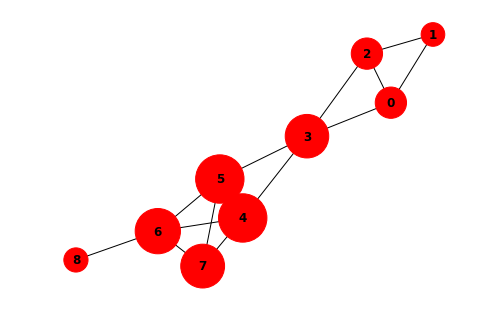

In [15]:
output_notebook()

def eigenvector_centraility_plot_matplotlib(adj_matrix):
    ec = centraility_eigenvector(adj_matrix)
    nodes_S = [n*5000 for n in ec.values()]
    A = np.array(adj_matrix)
    H = nx.from_numpy_matrix(A)
    nx.draw(H, node_size = nodes_S,with_labels=True, font_weight='bold')    
    plt.show()

eigenvector_centraility_plot_matplotlib([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
             [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])

### Ploting using bokeh

In [16]:
def eigenvector_centraility_plot_bokeh(adj_matrix):
    ec = centraility_eigenvector(adj_matrix)
    A = np.array(adj_matrix)
    H = nx.from_numpy_matrix(A)
    output_notebook()


    node_size = {k:n*50  for k,n in ec.items()}
    nx.set_node_attributes(H, name = 'node_size', values = node_size)

    #source=ColumnDataSource(dict(node_size=n_s))

    source=ColumnDataSource(pd.DataFrame.from_dict({k:v for k,v in H.nodes(data=True)},orient='index'))
    #print(dict(node_size=node_size))
    plot = figure(title="Eigen Vector Centraility", x_range=(-2,2), y_range=(-2,2),
              tools="", toolbar_location=None)


    graph = from_networkx(H, nx.spring_layout, scale=2, center=(0,0))
    graph.node_renderer.data_source = source
    graph.node_renderer.glyph = Circle(size="node_size")
    plot.renderers.append(graph)

    show(plot)

eigenvector_centraility_plot_bokeh([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
             [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])

Loading BokehJS ...

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='c43d5dca-f3b7-4871-b73d-3f98fbe78f08', ...)
